In [85]:
import pandas as pd
import os
inpath = './data'
files = ['서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv',
          '서울교통공사_역별 일별 시간대별 승하차인원 정보_20231031.csv',
          '서울교통공사_역별 일별 시간대별 승하차인원 정보_23.11_24.01.csv',
          '서울교통공사_역별 일별 시간대별 승하차인원(24.2~24.5).csv']
dfs = []

col_names = ['연번', '날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후']
for file in files:
    df = pd.read_csv(os.path.join(inpath, file), encoding='cp949')
    df.rename(columns=dict(zip(df.columns, col_names)), inplace=True)
    dfs.append(df)
df = pd.concat(dfs)

C:\Users\zerot\AppData\Local\Temp\ipykernel_16248\214377726.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(inpath, file), encoding='cp949')


In [86]:
df_in = df[(df['역명']=='가산디지털단지') & (df['구분']=='승차')]
df_out = df[(df['역명']=='가산디지털단지') & (df['구분']=='하차')]
print(len(df_in), len(df_out))

882 882


In [87]:
use_col = ['날짜', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후']
yy_in = df_in[use_col[2:]].mean(axis=0).values
yy_out = df_out[use_col[2:]].mean(axis=0).values


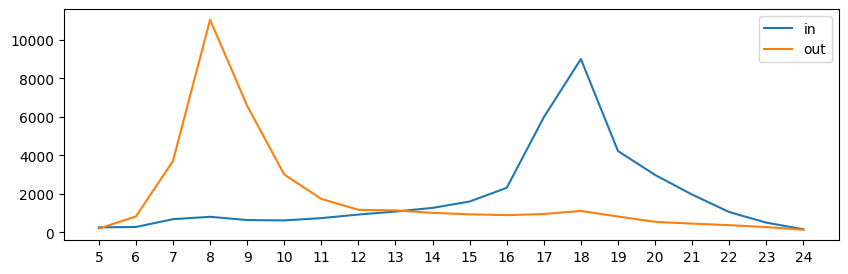

In [88]:
import matplotlib.pyplot as plt
xx = range(5, 24 + 1)
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.plot(xx, yy_in, label='in')
ax.plot(xx, yy_out, label='out')
ax.set_xticks(xx);
ax.legend()


In [89]:
df_gasan = df[use_col][df['역명'] == '가산디지털단지'].copy()
df_gasan['출근인원수'] = df_gasan[['07시-08시','08시-09시', '09시-10시']].sum(axis=1).copy()
df_gasan['퇴근인원수'] = df_gasan[['17시-18시','18시-19시', '19시-20시']].sum(axis=1).copy()

df_commute = pd.DataFrame(
    {'datetime': pd.to_datetime(df_gasan['날짜'][df_gasan['구분']=='승차'].tolist()),
     '출근인원수': df_gasan['출근인원수'][df_gasan['구분']=='하차'].tolist(),
     '퇴근인원수': df_gasan['퇴근인원수'][df_gasan['구분']=='승차'].tolist(),
     }
)

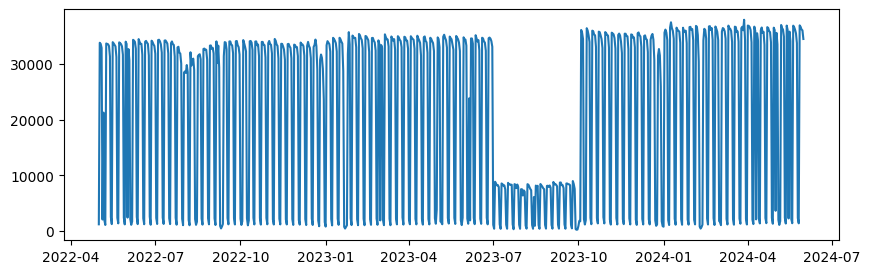

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
xx = df_commute['datetime'][df_commute['datetime']>= '2022-05-01']
ax.plot(xx, df_commute['출근인원수'][df_commute['datetime']>= '2022-05-01'])

